<a href="https://colab.research.google.com/github/Aneeshakaramath/LGMVIP-DataScience/blob/main/DECISION_TREE_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LET'S GROW MORE -VIRTUAL INTERNSHIP 2022**

 September 2022
 
 BY ANEESHA PARVEEN S K

# **DECISION TREE CLASSIFIER**
Decision tree builds classification or regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.


---


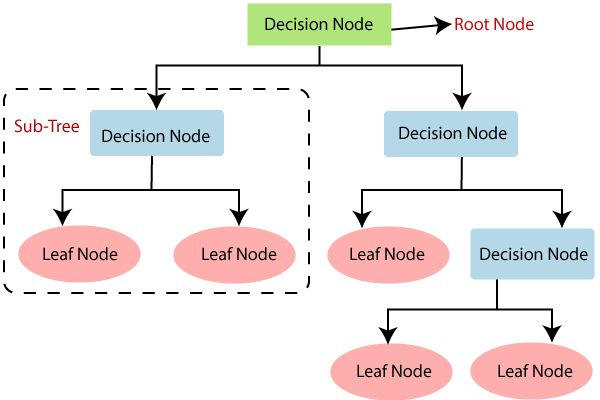



---



# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import scikitplot as skplt

# IMPORTING THE DATASET

In [4]:
data= pd.read_csv("/content/drive/MyDrive/DATASET/Iris.csv")

# ANALYSING THE DATASET

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.drop('Id', axis=1, inplace= True)

In [8]:
data.shape

(150, 5)

In [9]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [13]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
data.max()

SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [15]:
data.min()

SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

# VISUALISATION

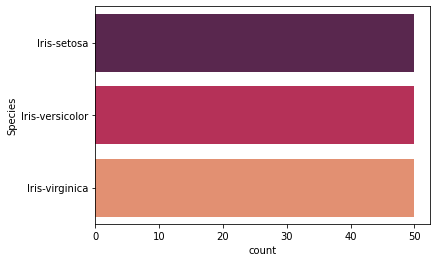

In [16]:
sns.countplot(y=data.Species ,data= data, palette="rocket")

SepalLengthCm       AxesSubplot(0.125,0.657941;0.352273x0.222059)
SepalWidthCm     AxesSubplot(0.547727,0.657941;0.352273x0.222059)
PetalLengthCm       AxesSubplot(0.125,0.391471;0.352273x0.222059)
PetalWidthCm     AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

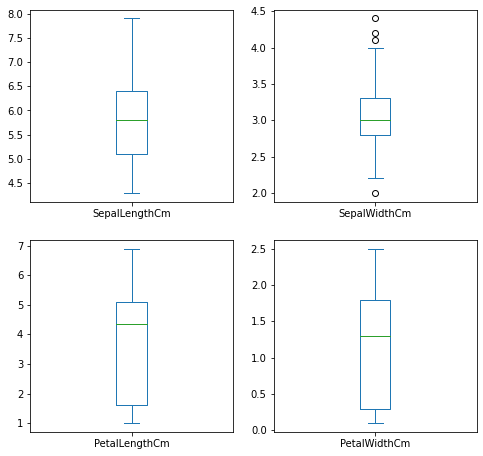

In [17]:
data.plot(kind='box',subplots= True, layout=(3,2),figsize=(8,12))

<function matplotlib.pyplot.show(*args, **kw)>

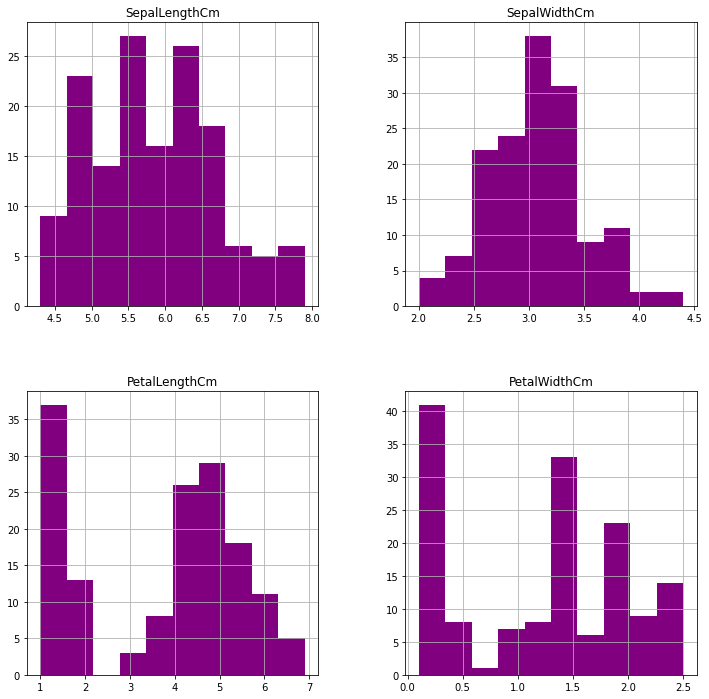

In [18]:
kwargs ={"color":"purple"}
data.hist(figsize=(12,12),**kwargs)
plt.show

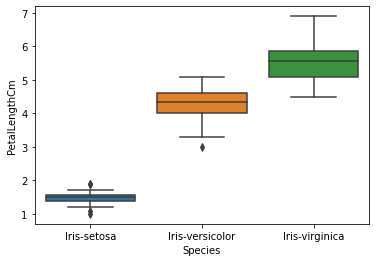

In [19]:
sns.boxplot(x='Species', y='PetalLengthCm', data=data)


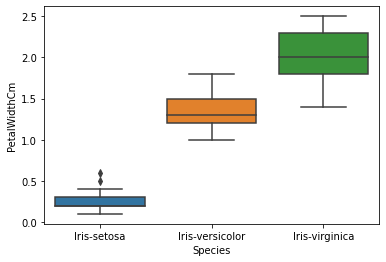

In [20]:
sns.boxplot(x='Species', y='PetalWidthCm', data=data)


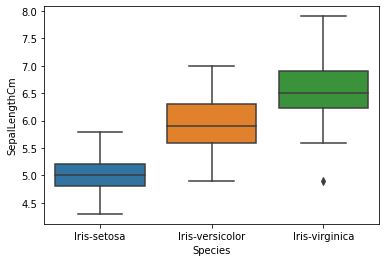

In [21]:
sns.boxplot(x='Species', y='SepalLengthCm', data=data)


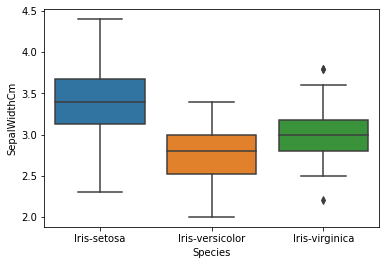

In [22]:
sns.boxplot(x='Species', y='SepalWidthCm', data=data)

# DATA PREPROCESSING

In [23]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


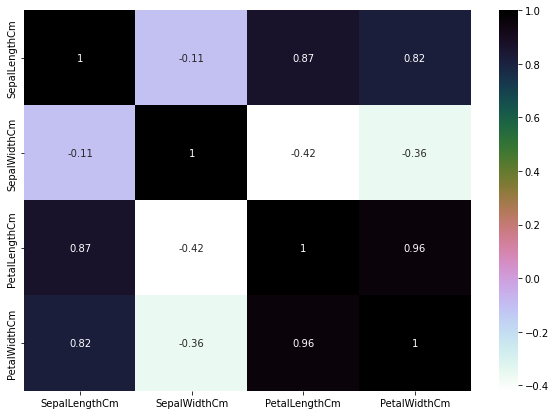

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot = True ,cmap ='cubehelix_r')
plt.show()

# LABEL ENCODING

In [25]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [26]:
data['Species']= le.fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
x= data.drop(columns= ['Species'])
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y= data['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

# TRAINING THE MODEL & EVALUATION

In [29]:
from sklearn.model_selection import train_test_split
tt= train_test_split
xtrain,xtest, ytrain,ytest = tt(x,y,test_size= 0.3 , random_state=0 )

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [31]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
gnb = GaussianNB()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

In [32]:
models= [lr,knn,svc,gnb,dtc,rfc]
scores= []

for model in models:
  model.fit(xtrain, ytrain)
  ypred= model.predict(xtest)
  scores.append(accuracy_score(ytest,ypred))
  model_name = type(model).__name__
  print("Accuracy of {} is {}".format(model_name, accuracy_score(ytest,ypred)) )



Accuracy of LogisticRegression is 0.9777777777777777
Accuracy of KNeighborsClassifier is 0.9777777777777777
Accuracy of SVC is 0.9777777777777777
Accuracy of GaussianNB is 1.0
Accuracy of DecisionTreeClassifier is 0.9777777777777777
Accuracy of RandomForestClassifier is 0.9777777777777777


# ACCURACY OF CONFUSION MATRIX

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cn=confusion_matrix(ytest,ypred)
cn

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

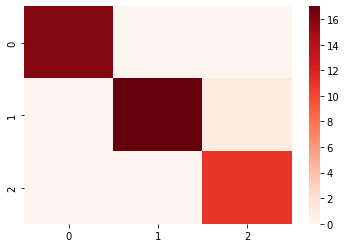

In [35]:
sns.heatmap(cn,cmap='Reds')

# BUILDING DECISION TREE CLASSIFIER MODEL

[Text(0.4, 0.9, 'X[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'X[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

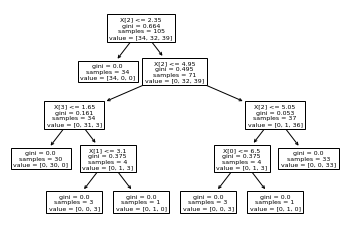

In [36]:
from sklearn import tree
tree.plot_tree(dtc)

In [40]:
modelx= DecisionTreeClassifier().fit(x,y)

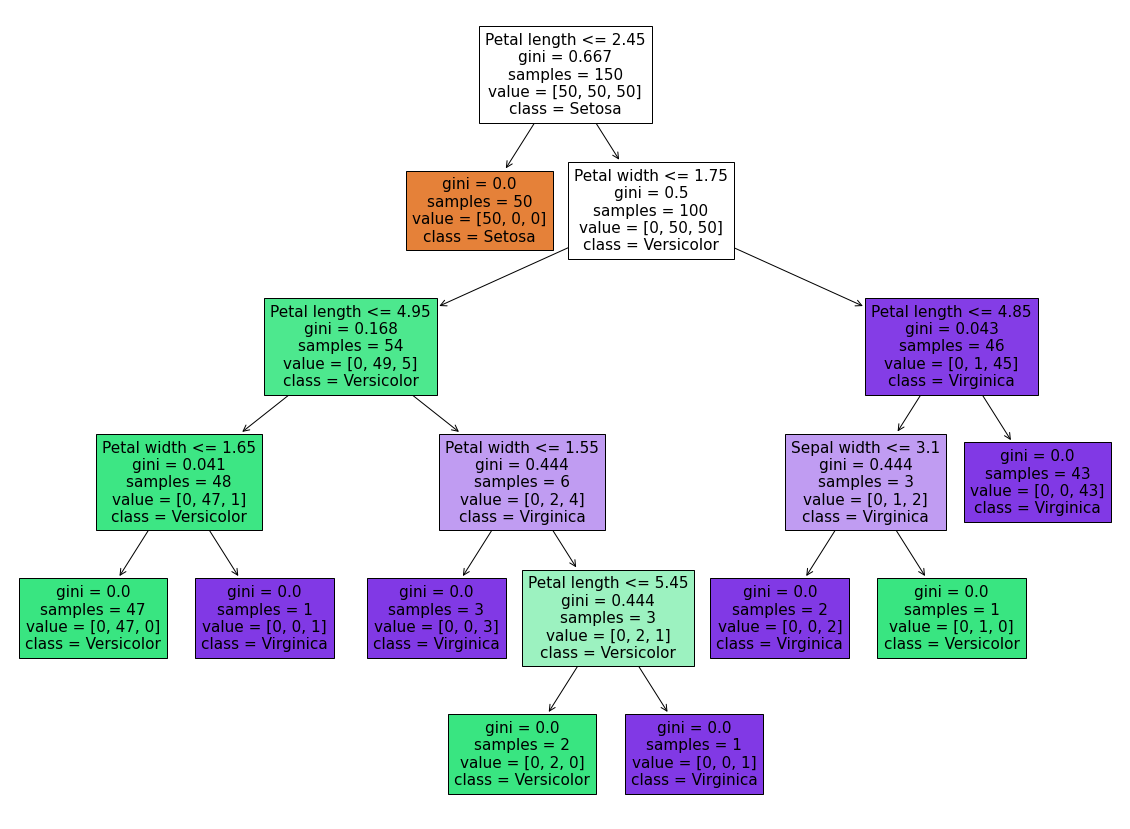

In [41]:
plt.figure(figsize = (20,15))
tree = tree.plot_tree(modelx, feature_names = f_n, class_names = c_n, filled = True)